In [ ]:
# Dlibのインストール
!pip install dlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

マスクをしている人が写った写真のキャプチャ画像をできるだけたくさん集めて一つのフォルダにまとめて保存し、zipファイルにしてアップロードする。

ファイル名は必ず半角英数のみにしておくべし

In [ ]:
!unzip "capture.zip"

Archive:  capture.zip
  inflating: capture/img (1).png     
  inflating: capture/img (10).png    
  inflating: capture/img (11).png    
  inflating: capture/img (12).png    
  inflating: capture/img (13).png    
  inflating: capture/img (14).png    
  inflating: capture/img (15).png    
  inflating: capture/img (16).png    
  inflating: capture/img (17).png    
  inflating: capture/img (18).png    
  inflating: capture/img (19).png    
  inflating: capture/img (2).png     
  inflating: capture/img (20).png    
  inflating: capture/img (21).png    
  inflating: capture/img (22).png    
  inflating: capture/img (23).png    
  inflating: capture/img (24).png    
  inflating: capture/img (25).png    
  inflating: capture/img (26).png    
  inflating: capture/img (27).png    
  inflating: capture/img (28).png    
  inflating: capture/img (29).png    
  inflating: capture/img (3).png     
  inflating: capture/img (30).png    
  inflating: capture/img (31).png    
  inflating: capture/img (32

展開したフォルダ名を「capture」に変更しておくこと

In [ ]:
import cv2, dlib, sys, glob, pprint

In [ ]:
# 入力ディレクトリの指定
indir = "./capture"
# 出力ディレクトリの指定
outdir = "./face"
# 暫定的な画像のID
fid = 1000
# 入力画像をリサイズするか？
flag_resize = False

# dlibをはじめる
detector = dlib.get_frontal_face_detector()

# 顔画像を取得して保存する
def get_face(fname):
    global fid
    img = cv2.imread(fname)
    # デジタルカメラなどの画像であれば
    # サイズが大きいのでリサイズ
    if flag_resize:
        img = cv2.resize(img, None,
            fx = 0.2, fy = 0.2)
    # 顔検出
    dets = detector(img, 1)
    for k, d in enumerate(dets):
        pprint.pprint(d)
        x1 = int(d.left())
        y1 = int(d.top())
        x2 = int(d.right())
        y2 = int(d.bottom())
        im = img[y1:y2, x1:x2]
        # 50x50にリサイズ
        try:
            im = cv2.resize(im, (50, 50))
        except:
            continue
        # 保存
        out = outdir + "/" + str(fid) + ".jpg"
        cv2.imwrite(out, im)
        fid += 1

# ファイルを列挙して繰り返し顔検出を行う
files = glob.glob(indir+"/*")
for f in files:
    print(f)
    get_face(f)
print("ok")


./capture/img (33).png
rectangle(613,713,703,803)
rectangle(366,447,417,499)
rectangle(700,356,855,511)
rectangle(475,326,527,378)
rectangle(308,447,360,499)
rectangle(481,447,533,499)
rectangle(423,447,475,499)
./capture/img (7).png
rectangle(677,319,784,426)
rectangle(64,322,218,477)
rectangle(325,712,454,841)
./capture/img (2).png
rectangle(1262,319,1369,426)
./capture/img (5).png
rectangle(438,378,545,486)
rectangle(1558,755,1687,884)
rectangle(1405,343,1513,450)
rectangle(1393,254,1429,290)
rectangle(593,725,700,832)
rectangle(808,247,852,290)
rectangle(917,735,992,810)
./capture/img (35).png
rectangle(132,356,287,511)
rectangle(1161,723,1250,813)
./capture/img (3).png
rectangle(901,758,953,810)
rectangle(786,758,838,810)
rectangle(521,677,629,785)
rectangle(1310,331,1417,438)
./capture/img (44).png
rectangle(390,270,545,425)
rectangle(1663,288,1818,442)
rectangle(1238,307,1345,414)
rectangle(126,654,215,743)
./capture/img (54).png
rectangle(1557,374,1593,410)
rectangle(1178,358,1

In [ ]:
# faceデータをzip圧縮してダウンロード
import shutil
shutil.make_archive('facedata', format='zip', root_dir='face')

'/content/facedata.zip'

# 顔画像データのzipをアップロード

サンプル用imagesetの内容

*   mask_on 70枚
*   mask_on_test 10枚
*   mask_off 70枚
*   mask_off_test 10枚

In [ ]:
!unzip "imageset.zip"

Archive:  imageset.zip
   creating: imageset/mask_off/
  inflating: imageset/mask_off/1091.jpg  
  inflating: imageset/mask_off/1105.jpg  
  inflating: imageset/mask_off/1106.jpg  
  inflating: imageset/mask_off/1109.jpg  
  inflating: imageset/mask_off/1115.jpg  
  inflating: imageset/mask_off/1116.jpg  
  inflating: imageset/mask_off/1117.jpg  
  inflating: imageset/mask_off/1118.jpg  
  inflating: imageset/mask_off/1131.jpg  
  inflating: imageset/mask_off/1138.jpg  
  inflating: imageset/mask_off/1142.jpg  
  inflating: imageset/mask_off/1143.jpg  
  inflating: imageset/mask_off/1144.jpg  
  inflating: imageset/mask_off/1145.jpg  
  inflating: imageset/mask_off/1146.jpg  
  inflating: imageset/mask_off/1147.jpg  
  inflating: imageset/mask_off/1148.jpg  
  inflating: imageset/mask_off/1149.jpg  
  inflating: imageset/mask_off/1150.jpg  
  inflating: imageset/mask_off/1151.jpg  
  inflating: imageset/mask_off/1152.jpg  
  inflating: imageset/mask_off/1153.jpg  
  inflating: imageset

マスクの有無の学習

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import cv2, glob
import numpy as np

# 画像形式の指定
in_shape = (50, 50, 3)
nb_classes = 2

In [ ]:
# CNNモデル構造を定義
model = Sequential()
model = Sequential()
model.add(Conv2D(32,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

ストリーミング出力は最後の 5000 行に切り捨てられました。
  [105 110 109]
  [ 99 100 104]
  ...
  [115 118 132]
  [110 110 122]
  [102 101 111]]

 [[201 206 205]
  [109 114 113]
  [105 106 110]
  ...
  [112 115 129]
  [112 112 124]
  [108 107 117]]

 [[196 201 200]
  [115 120 119]
  [111 112 116]
  ...
  [116 119 133]
  [109 109 121]
  [108 107 117]]

 ...

 [[ 51  53  63]
  [ 53  56  64]
  [ 66  68  76]
  ...
  [ 79  79  93]
  [ 75  75  91]
  [ 87  87 103]]

 [[ 52  54  65]
  [ 49  51  61]
  [ 58  60  68]
  ...
  [ 91  91 107]
  [ 80  80  98]
  [ 81  81  99]]

 [[ 51  53  64]
  [ 46  48  58]
  [ 56  57  67]
  ...
  [ 91  94 109]
  [ 82  82 100]
  [ 82  82 100]]]
imageset/mask_on/1073.jpg
[[[ 30  86 151]
  [ 32  88 153]
  [ 30  88 153]
  ...
  [207 204 190]
  [210 203 194]
  [209 202 193]]

 [[ 43  97 162]
  [ 31  87 152]
  [ 25  81 146]
  ...
  [205 203 192]
  [208 203 194]
  [209 202 193]]

 [[ 40  92 158]
  [ 39  93 158]
  [ 38  92 155]
  ...
  [201 202 193]
  [205 203 193]
  [206 202 191]]

 ...

 [[151 150

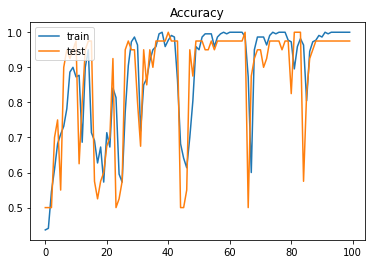

In [ ]:
# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 画像データをNumpy形式に変換
x = []
y = []
def read_files(target_files, y_val):
    files = glob.glob(target_files)
    for fname in files:
        print(fname)
        # 画像を読み出し
        img = cv2.imread(fname)
        # 画像サイズを50x50に変換
        img = cv2.resize(img, (50, 50))
        print(img)
        x.append(img)
        y.append(np.array(y_val))

# ディレクトリ内の画像を集める
read_files("imageset/mask_off/*.jpg", [1,0])
read_files("imageset/mask_on/*.jpg", [0,1])
x_train, y_train = (np.array(x), np.array(y))
# テスト用の画像をNumpy形式で得る
x, y = [[], []]
read_files("imageset/mask_off_test/*.jpg", [1,0])
read_files("imageset/mask_on_test/*.jpg", [0,1])
x_test, y_test = (np.array(x), np.array(y))
# データを学習
hist = model.fit(x_train, y_train,
    batch_size=100,
    epochs=100,
    validation_data=(x_test, y_test))
# データを評価
score = model.evaluate(x_test, y_test, verbose=1)
print("正解率=", score[1], 'loss=', score[0])
# モデルを保存
model.save('mask_model.h5')
# 学習の様子を描画
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

←メニューから<>（コードスニペット）を開く「Camera Capture」を追加

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


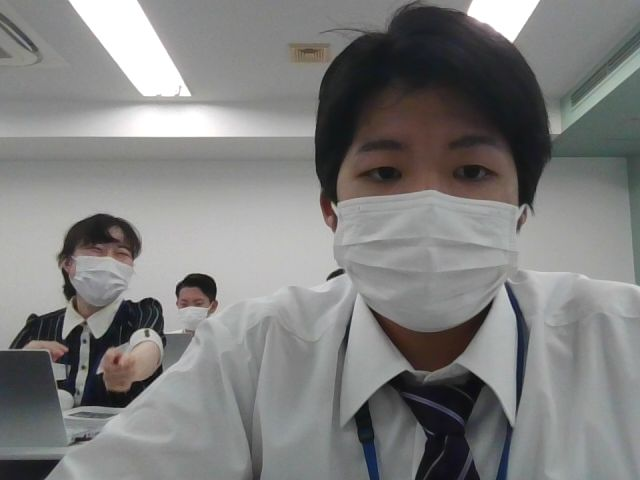

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  img = cv2.imread(filename)
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import keras
import cv2, dlib, pprint, os
import numpy as np
from keras.models import load_model

# 結果ラベル
res_labels = ['NO MASK!!', 'ok']
save_dir = "./live"

# 保存した学習データを読む
model = load_model('mask_model.h5')

# Dlibをはじめる
detector = dlib.get_frontal_face_detector()

# Webカメラから入力を開始
red = (0,0,255)
green = (0, 255, 0)
fid = 1

# Googleのカメラキャプチャ機能を呼び出し表示する
# cap = cv2.VideoCapture(0)
filename = take_photo()
# capture
frame = cv2.imread(filename)

# 画像を縮小表示する
frame = cv2.resize(frame, (500,300))
# 顔検出
dets = detector(frame, 1)
for k, d in enumerate(dets):
    pprint.pprint(d)
    x1 = int(d.left())
    y1 = int(d.top())
    x2 = int(d.right())
    y2 = int(d.bottom())
    # 顔部分を切り取る
    im = frame[y1:y2, x1:x2]
    im = cv2.resize(im, (50, 50))
    im = im.reshape(-1, 50, 50, 3)
    # 予測
    res = model.predict([im])[0]
    v = res.argmax()
    print(res_labels[v], res)
    # 枠を描画
    color = green if v == 1 else red
    border = 2 if v == 1 else 7
    cv2.rectangle(frame, 
        (x1, y1), (x2, y2), color, 
        thickness=border)
    # テキストを描画
    cv2.putText(frame,
        res_labels[v], (x1, y1-7),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.9, color, thickness=2)
if len(dets) > 0: # 結果を保存
    if os.path.exists(save_dir):
        jpgfile = save_dir + "/" + str(fid) + ".png"
        cv2.imwrite(jpgfile, frame)
        fid += 1
        
# ウィンドウに画像を出力
cv2_imshow(frame)